**LAB9**

**AIM: SVM classifier on MNIST dataset, compare the preformance of linear, polynomial and RBF kernels.**

Nirali Shah | CE122

In [1]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [3]:
from sklearn import datasets

mnist=datasets.load_digits()
# print("Features: ",mnist.)
print("Targets: ",mnist.target_names)

Targets:  [0 1 2 3 4 5 6 7 8 9]


In [6]:
mnist.data.shape

(1797, 64)

In [7]:
print(mnist.target)

[0 1 2 ... 8 9 8]


In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(mnist.data,mnist.target,test_size=0.2,random_state=122)

In [12]:

clf_linear = svm.SVC(kernel='linear',random_state=122) # Linear Kernel
clf_linear.fit(X_train,Y_train)
#Predict the response for test dataset
y_pred_linear = clf_linear.predict(X_test)
print(y_pred_linear)

[4 3 6 8 0 0 9 6 3 5 9 9 5 6 7 0 1 1 5 4 4 3 2 6 1 3 9 9 2 7 8 1 6 0 5 4 5
 5 3 2 9 1 1 6 5 4 6 2 6 8 9 6 7 7 9 0 6 9 4 2 5 7 0 2 1 3 0 0 3 9 5 6 4 1
 5 2 0 7 6 9 2 7 0 3 8 0 4 2 6 2 2 7 9 3 1 2 9 2 1 6 0 2 8 1 4 4 7 4 8 5 0
 4 0 4 5 1 7 6 0 4 5 4 6 4 0 2 2 7 3 1 7 7 8 7 3 1 0 6 5 2 2 0 8 2 8 6 4 5
 7 6 2 2 7 4 9 6 0 6 6 4 2 3 8 3 8 9 9 8 7 7 6 8 8 3 5 4 7 9 6 2 7 5 7 5 7
 6 2 5 6 1 8 3 2 1 6 9 5 8 3 5 1 0 3 9 3 1 1 9 3 8 9 1 0 3 2 4 5 0 5 8 5 8
 6 1 7 8 9 8 0 0 5 7 3 2 5 1 5 3 5 4 0 8 9 5 0 4 7 4 7 0 0 0 3 6 7 1 4 0 3
 0 4 4 6 2 9 1 1 2 0 0 0 9 3 3 1 2 0 3 8 0 3 6 0 5 8 2 9 3 0 8 8 8 9 2 3 6
 1 5 4 7 6 6 8 2 7 6 4 7 5 4 1 6 4 3 6 8 8 5 9 4 4 4 9 0 6 6 2 4 5 3 4 2 4
 4 5 5 7 7 6 0 2 0 0 9 8 1 1 7 5 8 7 9 4 4 0 2 6 9 0 6]


In [13]:
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_linear))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Y_test, y_pred_linear,average='weighted'))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_test, y_pred_linear,average='weighted'))

Accuracy: 0.9722222222222222
Precision: 0.9735507605820105
Recall: 0.9722222222222222


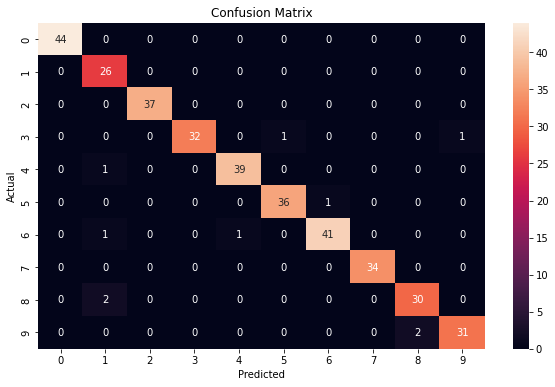

In [24]:

cm_linear = metrics.confusion_matrix(Y_test, y_pred_linear)
plt.subplots(figsize=(10, 6))
sb.heatmap(cm_linear, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
#using rbf kernel
clf_rbf = svm.SVC(kernel='rbf',gamma=0.005,random_state=122) # rbf Kernel
clf_rbf.fit(X_train,Y_train)
#Predict the response for test dataset
y_pred_rbf = clf_rbf.predict(X_test)
print(y_pred_rbf)

[4 3 6 8 0 0 9 6 3 5 9 9 5 8 7 0 1 1 5 4 4 3 2 6 1 3 9 9 2 7 8 1 6 0 5 4 5
 5 3 2 9 1 1 6 5 4 6 2 6 8 9 6 7 7 9 0 6 9 4 2 5 7 0 2 1 3 0 0 3 9 5 6 4 1
 5 2 0 7 6 9 2 7 0 3 8 0 4 2 6 2 2 7 9 3 8 2 9 2 1 6 0 2 9 1 4 4 7 4 8 5 0
 4 0 4 5 1 7 6 0 4 5 4 6 4 0 2 2 7 3 1 7 7 8 7 3 1 0 6 5 2 2 0 8 2 8 6 4 5
 7 6 2 2 7 4 9 6 0 6 6 4 2 3 8 3 8 9 9 8 7 7 6 8 8 3 5 4 7 9 6 2 7 5 7 5 7
 6 2 5 6 1 8 3 2 1 6 9 5 8 3 8 1 0 3 9 3 1 1 8 3 8 9 1 0 3 2 4 5 0 5 8 5 8
 6 1 7 8 9 8 0 0 5 7 3 2 5 1 5 3 5 4 0 8 9 5 0 4 7 4 7 8 0 0 3 6 7 8 4 0 3
 0 4 8 6 2 9 1 8 2 0 0 0 9 3 3 8 2 0 3 8 0 3 6 0 5 8 2 9 3 0 8 8 8 9 2 3 6
 1 5 8 7 6 6 8 2 7 6 4 7 5 4 1 6 4 3 6 8 8 5 9 4 4 4 9 0 6 6 2 4 5 3 4 2 4
 4 5 5 7 7 5 0 2 0 0 3 8 1 1 7 5 8 7 9 4 4 0 2 6 9 0 6]


In [19]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_rbf))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Y_test, y_pred_rbf,average='weighted'))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_test, y_pred_rbf,average='weighted'))

Accuracy: 0.975
Precision: 0.9804878048780489
Recall: 0.975


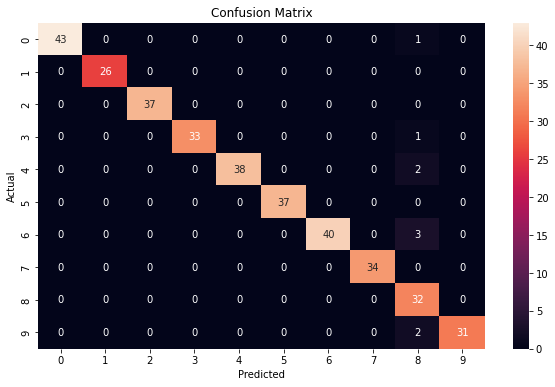

In [25]:
cm_rbf = metrics.confusion_matrix(Y_test, y_pred_rbf)
plt.subplots(figsize=(10, 6))
sb.heatmap(cm_rbf, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
#using poly kernel
clf_poly = svm.SVC(kernel='poly',degree=3,random_state=122) # poly Kernel
clf_poly.fit(X_train,Y_train)
#Predict the response for test dataset
y_pred_poly = clf_poly.predict(X_test)
print(y_pred_poly)

[4 3 6 8 0 0 9 6 3 5 9 9 5 6 7 0 1 1 5 4 4 3 2 6 1 3 9 9 2 7 8 1 6 0 5 4 5
 5 3 2 9 1 1 6 5 4 6 2 6 8 9 6 7 7 9 0 6 9 4 2 5 7 0 2 1 3 0 0 3 9 5 6 4 1
 5 2 0 7 6 9 2 7 0 3 8 0 4 2 6 2 2 7 9 3 8 2 9 2 1 6 0 2 9 1 4 4 7 4 8 5 0
 4 0 4 5 1 7 6 0 4 5 4 6 4 0 2 2 7 3 1 7 7 8 7 3 1 0 6 5 2 2 0 8 2 8 6 4 5
 7 6 2 2 7 4 9 6 0 6 6 4 2 3 8 3 8 9 9 8 7 7 6 8 8 3 5 4 7 9 6 2 7 5 7 5 7
 6 2 5 6 1 8 3 2 1 6 9 5 8 3 5 1 0 3 9 3 1 1 9 3 8 9 1 0 3 2 4 5 0 5 8 5 8
 6 1 7 8 9 8 0 0 5 7 3 2 5 1 5 3 5 4 0 8 9 5 0 4 7 4 7 0 0 0 3 6 7 8 4 0 3
 0 4 4 6 2 9 1 1 2 0 0 0 9 3 3 1 2 0 3 8 0 3 6 0 5 8 2 9 3 0 8 8 8 9 2 3 6
 1 5 4 7 6 6 8 2 7 6 4 7 5 4 1 6 4 3 6 8 8 5 9 4 4 4 9 0 6 6 2 4 5 3 4 2 4
 4 5 5 7 7 6 0 2 0 0 3 8 1 1 7 5 8 7 9 4 4 0 2 6 9 0 6]


In [22]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_poly))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Y_test, y_pred_poly,average='weighted'))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_test, y_pred_poly,average='weighted'))

Accuracy: 0.9833333333333333
Precision: 0.9837481962481961
Recall: 0.9833333333333333


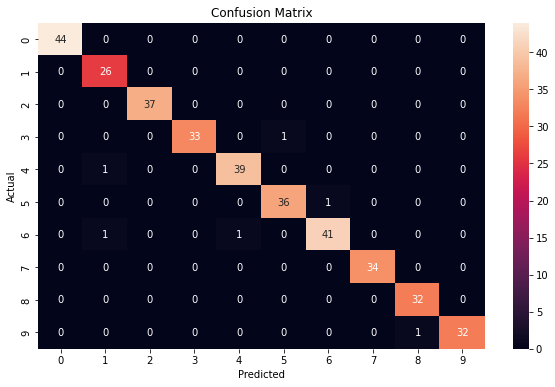

In [26]:
cm_poly = metrics.confusion_matrix(Y_test, y_pred_poly)
plt.subplots(figsize=(10, 6))
sb.heatmap(cm_poly, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()